In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv("../data/benin-malanville.csv")

In [15]:
print(df.head())

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [17]:
#statistics Summary
#the mean, median, standard deviation, and other statistical measures

stat_summary = df.describe()
print(stat_summary)

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.2000

In [18]:
# Data Quality Check and Data Cleaning

# looking missing values
missing_data = df.isnull().sum()
print(missing_data)

# negative values
negative_values = df[df.select_dtypes(include='number') < 0]
if not negative_values.empty:
    print("Negative values found:")
    print(negative_values)

#looking fr outliers 
for col in df.select_dtypes(include='number').columns:
    std_dev = df[col].std()
    mean = df[col].mean()
    outliers = df[(df[col] > mean + 3 * std_dev) | (df[col] < mean - 3 * std_dev)]
    if not outliers.empty:
        print(f"Outliers found in {col}:")
        print(outliers)

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Negative values found:
       Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb  RH  WS  WSgust  WSstdev  \
0            NaN -1.2 -0.2 -1.1   NaN   NaN   NaN NaN NaN     NaN      NaN   
1            NaN -1.1 -0.2 -1.1   NaN   NaN   NaN NaN NaN     NaN      NaN   
2            NaN -1.1 -0.2 -1.1   NaN   NaN   NaN NaN NaN     NaN      NaN   
3            NaN -1.1 -0.1 -1.0   NaN   NaN   NaN NaN NaN     NaN      NaN   
4            NaN -1.0 -0.1 -1.0   NaN   NaN   NaN NaN NaN     NaN      NaN   
...          ...  ...  ...  ...   ...   

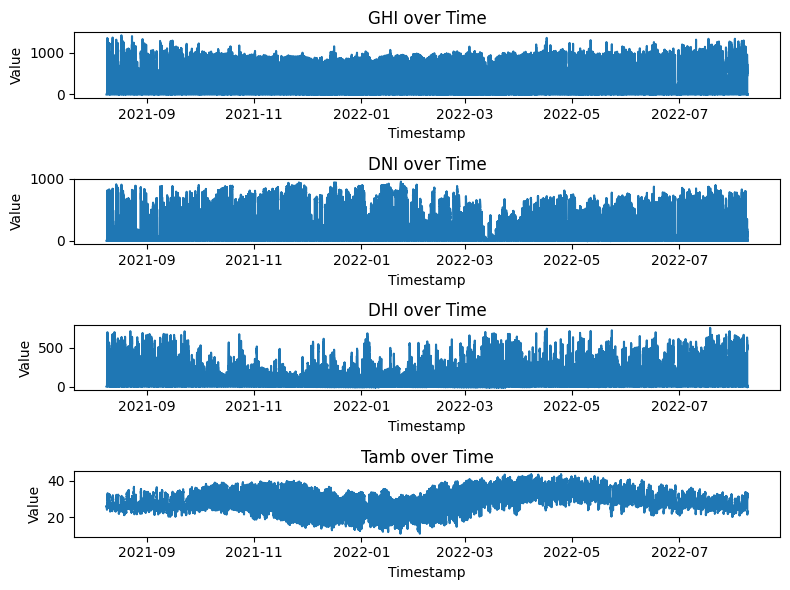

In [23]:
# Time Series Analysis
#Time Series Analysis: Analyze how variables like GHI, DNI, DHI, and Tamb

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp' , inplace = True )

variables = ['GHI', 'DNI', 'DHI', 'Tamb']

num_plots = len(variables)
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(8, 6))

#iterate over variables to be plotted
for i, var in enumerate(variables):
    sns.lineplot(x=df.index, y=var, data=df, ax=axes[i])
    axes[i].set_title(f'{var} over Time')
    axes[i].set_xlabel('Timestamp')
    axes[i].set_ylabel('Value')

plt.tight_layout()
plt.show()


In [24]:
#correlation Analysis
#Determine the correlation between different
# variables like solar radiation components (GHI, DHI, DNI) and temperature
# measures (TModA, TModB) to uncover relationships.

correlation_matrix = df.corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                    GHI       DNI       DHI      ModA      ModB      Tamb  \
GHI            1.000000  0.882376  0.849989  0.994443  0.994869  0.547513   
DNI            0.882376  1.000000  0.546602  0.892023  0.892012  0.467584   
DHI            0.849989  0.546602  1.000000  0.829923  0.827886  0.503925   
ModA           0.994443  0.892023  0.829923  1.000000  0.998745  0.526868   
ModB           0.994869  0.892012  0.827886  0.998745  1.000000  0.525370   
Tamb           0.547513  0.467584  0.503925  0.526868  0.525370  1.000000   
RH            -0.360029 -0.373475 -0.285018 -0.383205 -0.365718 -0.414842   
WS             0.457349  0.397099  0.426959  0.458483  0.450123  0.347188   
WSgust         0.484144  0.419469  0.450904  0.484429  0.476380  0.362403   
WSstdev        0.446526  0.383303  0.414711  0.443467  0.438523  0.342418   
WD             0.079664  0.018839  0.102752  0.050262  0.061473  0.188081   
WDstdev        0.547242  0.471152  0.505968  0.538341  0

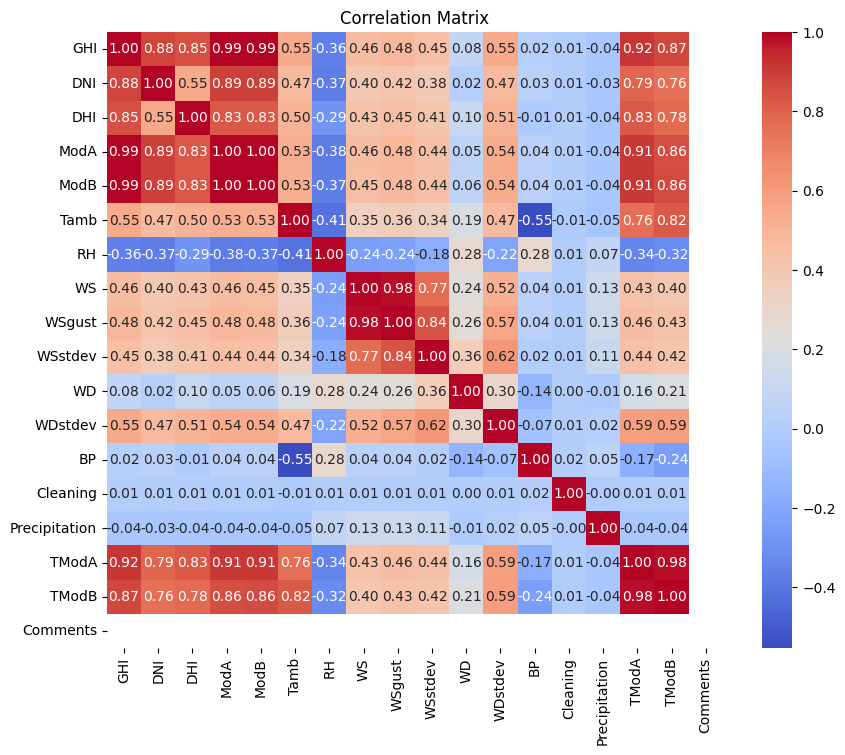

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

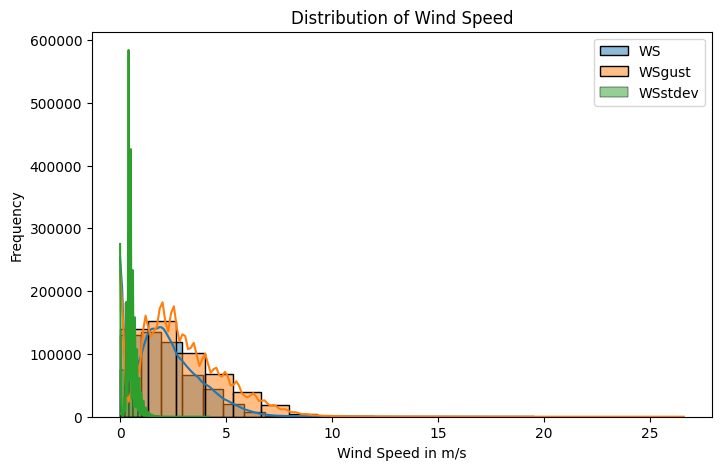

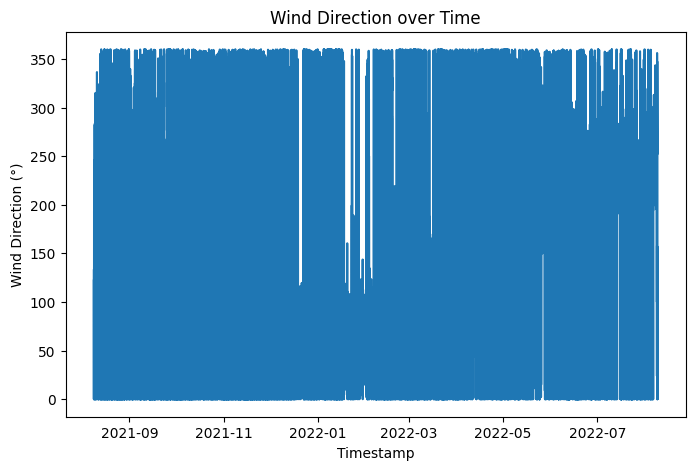

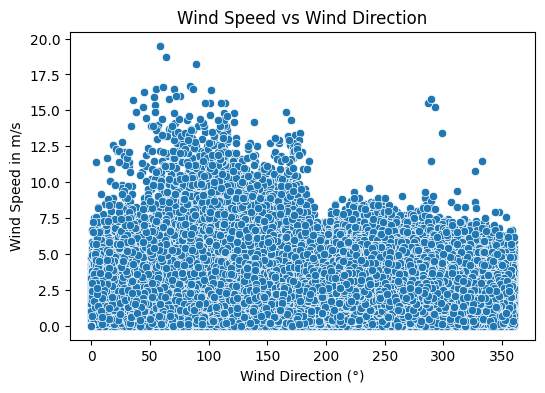

In [29]:
# Wind Analysis
# Explore wind speed (WS, WSgust, WSstdev) 
# and wind direction (WD, WDstdev) data 

wind_speed_columns = ['WS', 'WSgust', 'WSstdev']
plt.figure(figsize=(8, 5))

for col in wind_speed_columns:
    sns.histplot(df[col], bins=20, kde=True, label=col)

    
plt.title('Distribution of Wind Speed')
plt.xlabel('Wind Speed in m/s')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Wind Direction Analysis
plt.figure(figsize=(8, 5))
sns.lineplot(x='Timestamp', y='WD', data=df)
plt.title('Wind Direction over Time')
plt.xlabel('Timestamp')
plt.ylabel('Wind Direction (°)')
plt.show()

# Wind Speed vs. Wind Direction Analysis
plt.figure(figsize=(6, 4))
sns.scatterplot(x='WD', y='WS', data=df)
plt.title('Wind Speed vs Wind Direction')
plt.xlabel('Wind Direction (°)')
plt.ylabel('Wind Speed in m/s')
plt.show()

In [41]:
# Downsampling the data

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True) 

resampling_frequency = 'D'

downsampled_data = df.resample(resampling_frequency).mean()  

print(downsampled_data)

                   GHI         DNI         DHI        ModA        ModB  \
Timestamp                                                                
2021-08-09  236.276859   84.596108  164.662265  216.780959  217.264211   
2021-08-10  216.653958  119.740694  115.361806  198.448056  198.911736   
2021-08-11   98.108958    0.972569   97.081667   96.350069   96.189028   
2021-08-12  210.430972  104.388403  140.320000  189.359931  189.090000   
2021-08-13  121.741667    4.954583  115.950000  121.879792  121.752569   
...                ...         ...         ...         ...         ...   
2022-08-05  204.140347   76.762778  148.657014  183.651181  182.397083   
2022-08-06  234.804444  114.554861  156.494097  211.408542  210.026181   
2022-08-07  291.317500  265.802847   91.958403  256.630556  255.327778   
2022-08-08  163.250000   31.982847  133.600069  153.609931  152.475972   
2022-08-09   -5.500000   -0.100000   -5.700000    0.000000    0.000000   

                 Tamb         RH     

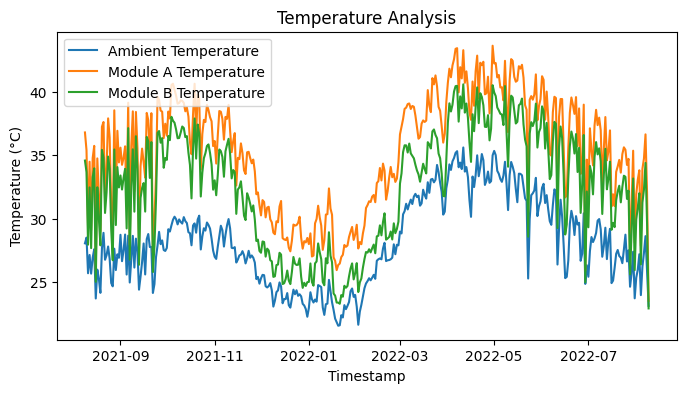

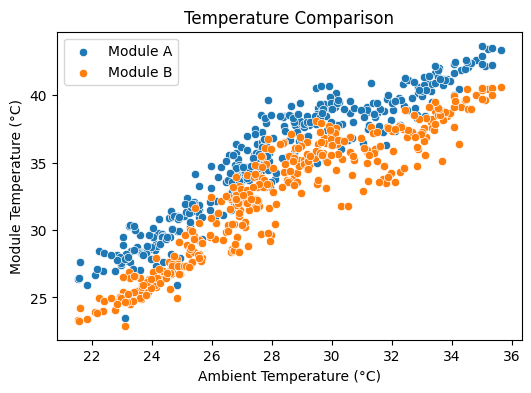

Correlation Matrix:
           Tamb     TModA     TModB
Tamb   1.000000  0.939928  0.929996
TModA  0.939928  1.000000  0.986219
TModB  0.929996  0.986219  1.000000


In [42]:
# Temperature Analysis: 

#Compare module temperatures (TModA, TModB)
# with ambient temperature (Tamb) to see how they are related or vary
# under different conditions.

# we will use the down sampled data to minimize the runtime
temperature_data = downsampled_data[['Tamb', 'TModA', 'TModB']]

# Temperature Analysis
plt.figure(figsize=(8, 4))
sns.lineplot(x='Timestamp', y='Tamb', data=temperature_data, label='Ambient Temperature')
sns.lineplot(x='Timestamp', y='TModA', data=temperature_data, label='Module A Temperature')
sns.lineplot(x='Timestamp', y='TModB', data=temperature_data, label='Module B Temperature')
plt.title('Temperature Analysis')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

# Temperature Comparison
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Tamb', y='TModA', data=temperature_data, label='Module A')
sns.scatterplot(x='Tamb', y='TModB', data=temperature_data, label='Module B')
plt.title('Temperature Comparison')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Module Temperature (°C)')
plt.legend()
plt.show()

# Correlation Analysis
correlation_matrix = temperature_data[['Tamb', 'TModA', 'TModB']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

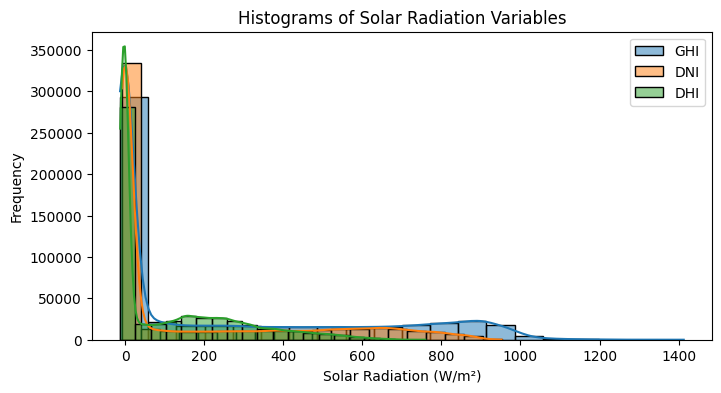

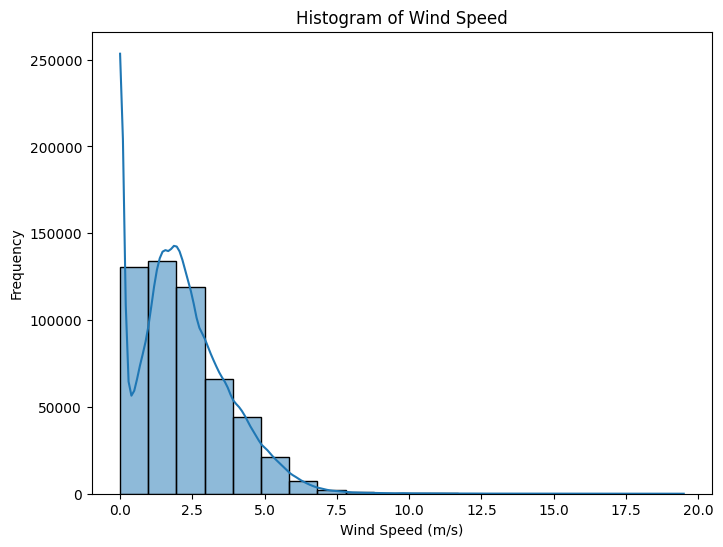

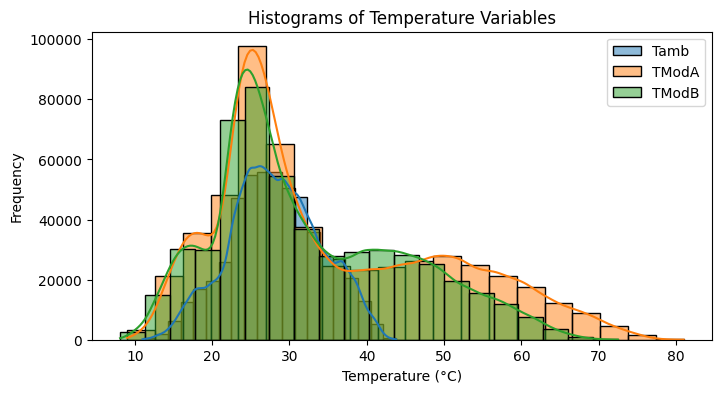

In [44]:
# Histograms: histograms for variables like GHI, DNI, DHI, WS, and
# temperatures to visualize the frequency distribution of these variables.


# Histograms for Solar Radiation Variables (GHI, DNI, DHI)
solar_radiation_variables = ['GHI', 'DNI', 'DHI']

plt.figure(figsize=(8, 4))

for var in solar_radiation_variables:
    sns.histplot(data[var], bins=20, kde=True, label=var)
    
plt.title('Histograms of Solar Radiation Variables')
plt.xlabel('Solar Radiation (W/m²)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Histogram for Wind Speed (WS)
plt.figure(figsize=(8, 6))
sns.histplot(data['WS'], bins=20, kde=True)
plt.title('Histogram of Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.show()

# Histograms for Temperatures (Tamb, TModA, TModB)
temperature_variables = ['Tamb', 'TModA', 'TModB']
plt.figure(figsize=(8, 4))
for var in temperature_variables:
    sns.histplot(data[var], bins=20, kde=True, label=var)
plt.title('Histograms of Temperature Variables')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

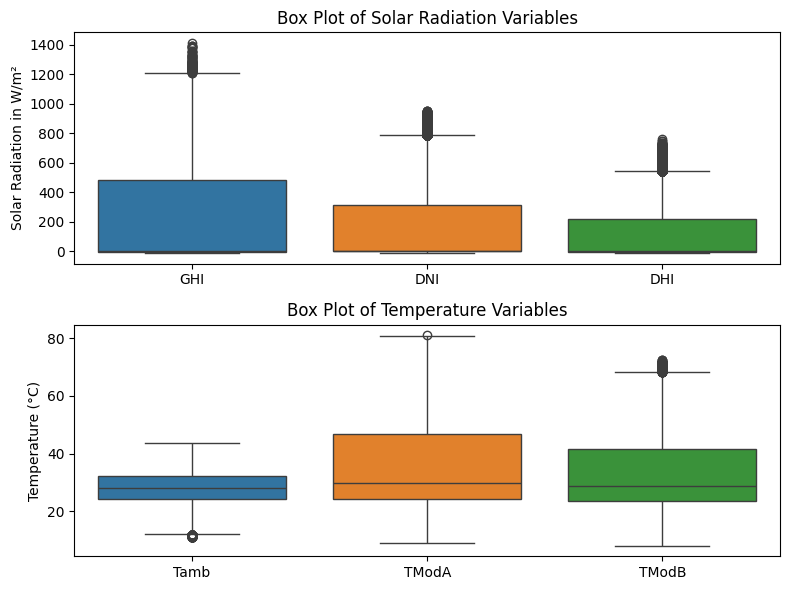

In [45]:
# Box Plots: to examine the spread and presence of outliers in
# the solar radiation and temperature data.


plt.figure(figsize=(8, 6))

# Solar Radiation Variables
plt.subplot(2, 1, 1)
sns.boxplot(data=df[['GHI', 'DNI', 'DHI']])
plt.title('Box Plot of Solar Radiation Variables')
plt.ylabel('Solar Radiation in W/m²')

# Temperature Variables
plt.subplot(2, 1, 2)
sns.boxplot(data=df[['Tamb', 'TModA', 'TModB']])
plt.title('Box Plot of Temperature Variables')
plt.ylabel('Temperature (°C)')

plt.tight_layout()
plt.show()



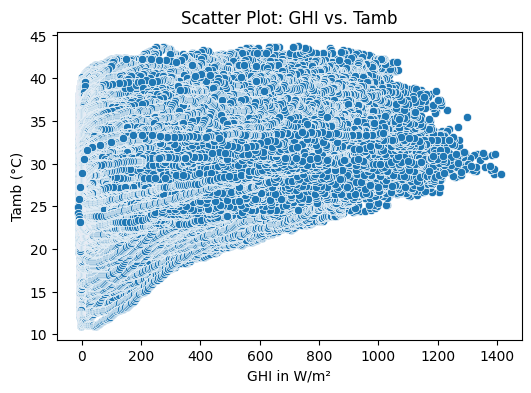

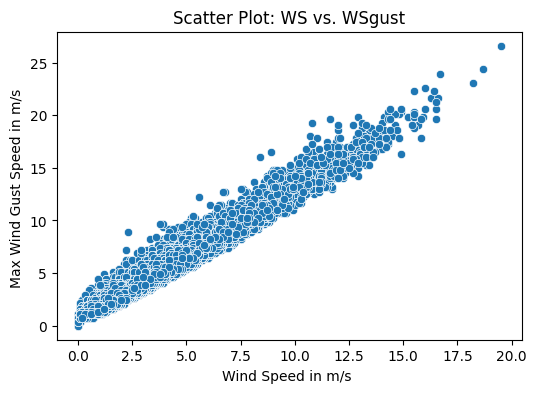

In [48]:
# Scatter Plots:

# Scatter plot: GHI vs. Tamb
plt.figure(figsize=(6, 4))
sns.scatterplot(x='GHI', y='Tamb', data=df)
plt.title('Scatter Plot: GHI vs. Tamb')
plt.xlabel('GHI in W/m²')
plt.ylabel('Tamb (°C)')
plt.show()

# Scatter plot: WS vs. WSgust
plt.figure(figsize=(6, 4))
sns.scatterplot(x='WS', y='WSgust', data=df)
plt.title('Scatter Plot: WS vs. WSgust')
plt.xlabel('Wind Speed in m/s ')
plt.ylabel('Max Wind Gust Speed in m/s ')
plt.show()

In [49]:

#remove rows with missing values in the 'Comments' column
df.dropna(inplace=True)
print("Cleaned Data Shape:", df.shape)

Cleaned Data Shape: (0, 18)


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GHI            0 non-null      float64
 1   DNI            0 non-null      float64
 2   DHI            0 non-null      float64
 3   ModA           0 non-null      float64
 4   ModB           0 non-null      float64
 5   Tamb           0 non-null      float64
 6   RH             0 non-null      float64
 7   WS             0 non-null      float64
 8   WSgust         0 non-null      float64
 9   WSstdev        0 non-null      float64
 10  WD             0 non-null      float64
 11  WDstdev        0 non-null      float64
 12  BP             0 non-null      int64  
 13  Cleaning       0 non-null      int64  
 14  Precipitation  0 non-null      float64
 15  TModA          0 non-null      float64
 16  TModB          0 non-null      float64
 17  Comments       0 non-null      float64
dtypes: float64(16), int

In [51]:
df.isnull().sum()

GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
Comments         0
dtype: int64